In [15]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# EXERCISE
The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

## Hypotheses
H0 : this company pays standard wages      
    $12.20 = $13.20

H1 : this company pays substandard wages   
    $12.20 < $13.20

alpha=0.01

In [16]:
mu = 13.2 #pop.ort
sd=2.5
n=40
xbar=12.2
alpha=0.01

In [17]:
z=(xbar-mu) / (sd/np.sqrt(n))
z

-2.5298221281347035

In [18]:
p = stats.norm.cdf(z)
p

0.005706018193000826

In [ ]:
# reject the null hypothesis, and accept the alternative hypothesis.

# EXERCISE 
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

## Hypotheses
H0 : the soils do not appear to differ with respect to average shear strength  
"Soil1.mean = Soil2.mean"

H1 : the soils appear to differ with respect to average shear strength         
"Soil1.mean != Soil2.mean"

alpha = 0.01

In [19]:
df = pd.read_excel("D:/İndirilenler/soil.xlsx")
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil1,30.0,1.691800,0.206903,1.110,1.572,1.675,1.86525,2.054
Soil2,35.0,1.417114,0.219184,1.053,1.231,1.379,1.55900,1.878


In [21]:
stats.shapiro(df["Soil1"].dropna()),stats.shapiro(df["Soil2"].dropna())

(ShapiroResult(statistic=0.9605797529220581, pvalue=0.32050010561943054),
 ShapiroResult(statistic=0.9684141278266907, pvalue=0.40118902921676636))

In [22]:
stats.levene(df["Soil1"].dropna(),df["Soil2"])

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [23]:
stats.ttest_ind(df["Soil1"].dropna(),df["Soil2"])

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.593228732352821e-06)

In [111]:
# do not reject the null hypothesis

# EXERCISE
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

## Hypotheses

H0: differences of math scores European (EU) and Asian (AS) countries are zero

H1: differences math scores of European (EU) and Asian (AS) countries are not zero

alpha : 0.05

In [95]:
df_Pisa = pd.read_csv("C:/Users/huawe/Downloads/2015 PISA Test - Sheet1.csv")
df_Pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [96]:
df_Pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [98]:
# df_Pisa.groupby("Continent_Code").describe().T

In [99]:
df_Pisa["Continent_Code"].unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [100]:
df_Pisa.loc[df_Pisa["Continent_Code"].isnull(),["Continent_Code"]] = "NA"

In [101]:
df_Pisa.isnull().sum()

Country Code              0
Continent_Code            0
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [103]:

stats.ttest_ind(df_Pisa[df_Pisa.Continent_Code == "EU"]["Math"], df_Pisa[df_Pisa.Continent_Code == "AS"]["Math"])

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [ ]:
# do not reject the null hypothesis

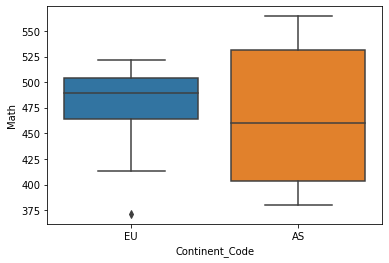

In [107]:
df_2 = df_Pisa[df_Pisa.Continent_Code.isin(["AS","EU"])][["Continent_Code","Math"]]
sns.boxplot(x="Continent_Code",y="Math",data=df_2);

In [112]:
# df_Pisa[df_Pisa.Continent_Code.isin(["AS","EU"])][["Continent_Code","Math"]].plot(kind="box", column="Math",by="Continent_Code",figsize=(12,6),subplots=True)
# plt.tight_layout()

# EXERCISE
A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

## Hypotheses

H0: the diet program have not an impact on customers weight loss

H1: the diet program have an impact on customers weight loss

alpha : 0.01

In [108]:
df_Gym = pd.read_csv("D:/İndirilenler/weight - Sheet1.csv")
df_Gym

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83
5,6,78,74
6,7,76,70
7,8,81,80
8,9,79,78
9,10,77,79


In [109]:
stats.ttest_rel(df_Gym["ending"],df_Gym["starting"],alternative="less")

Ttest_relResult(statistic=-2.6780834840499255, pvalue=0.00900646517506626)

In [114]:
# reject the null hypothesis, and accept the alternative hypothesis.